### Temperature Prediction

### Problem Statement:

Data Set Information:

    This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

#### Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

#### Let's start with importing libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import mode
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('temperaturedataset.csv')

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
# let's check summary of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
# checking null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are several null values in the dataset.

In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Obeservation:
    
    All the datatypes are in float except for the date column.

In [7]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

Observation:

    There is skewness present in many continuous columns.

In [8]:
# setting option to see all the columns.
pd.set_option('display.max_columns',None)

In [9]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Observation:
    
    Count is different in different row indicating missing values. Mean is not equal to median, data does not follow normal distribution. There is high variance in solar radiation column while some columns such as lon and lat have variance close to zero. Difference between minimum, maximum and interquartile range is m=not equal which indicates presence of outliers.
    

In [10]:
# separating categorical and continuous variables
cont=[i for i in df.columns if df[i].nunique()>30 and i!='Date']
cat=[i for i in df.columns if df[i].nunique()<30]

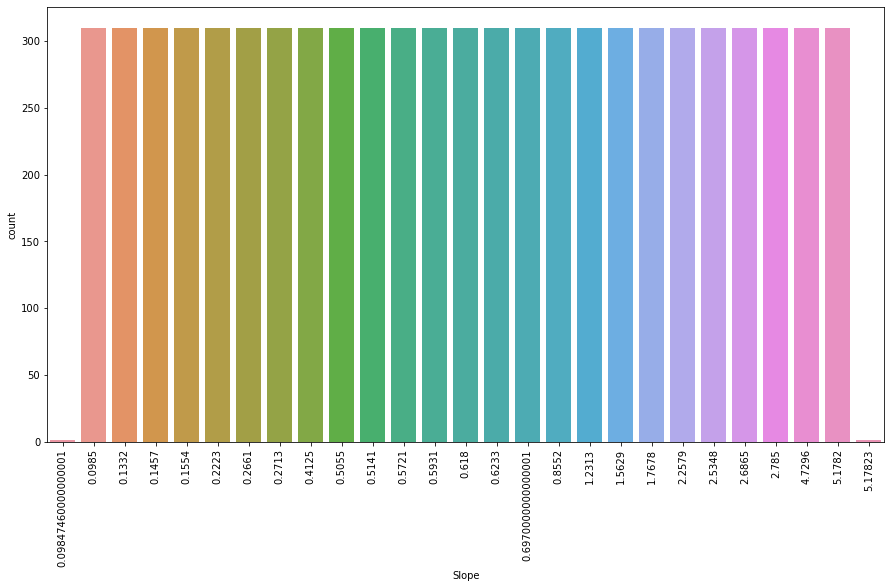

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=df)
plt.xticks(rotation=90)
df['Slope'].value_counts()
plt.show()

Observation:
    
    

All the slope values have equal no. of counts except for 2 slopes which have only one count each. These values seem to belong to their rounded of categories respectively.


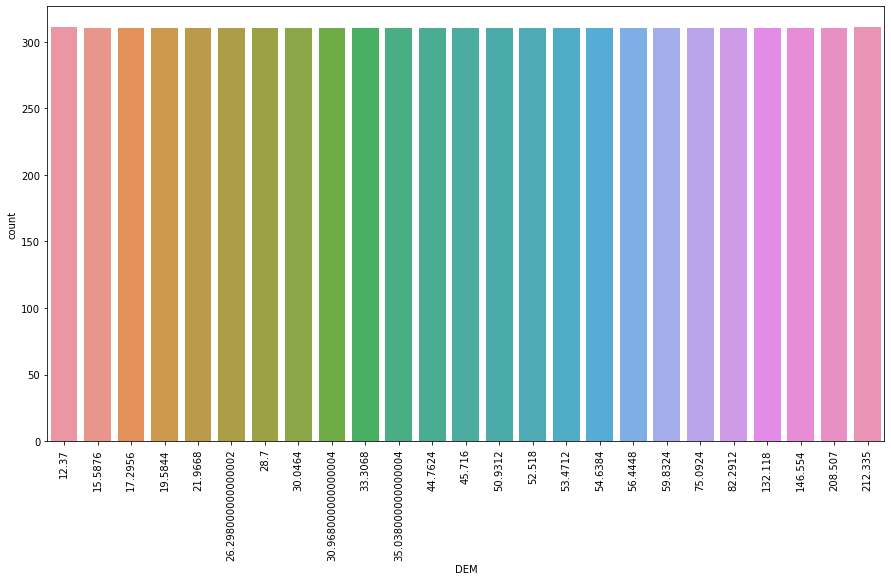

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=df)
plt.xticks(rotation=90)
df['DEM'].value_counts()
plt.show()

Observation:
    
    All the elevations have same count equal to 310 except two who have 311 counts each.

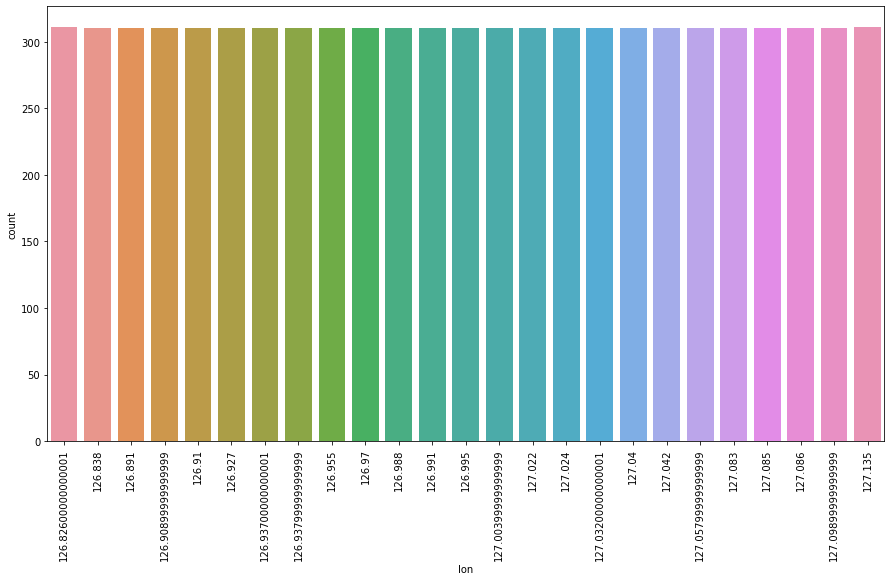

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x='lon',data=df)
plt.xticks(rotation=90)
df['lon'].value_counts()
plt.show()



All the longitude have smae count equal to 310 except two longitudes that have 311 counts each.


Minimum Tmax is 20.0 and Maximum Tmax is 37.6
Minimum Tmin is 11.3 and Maximum Tmin is 29.9


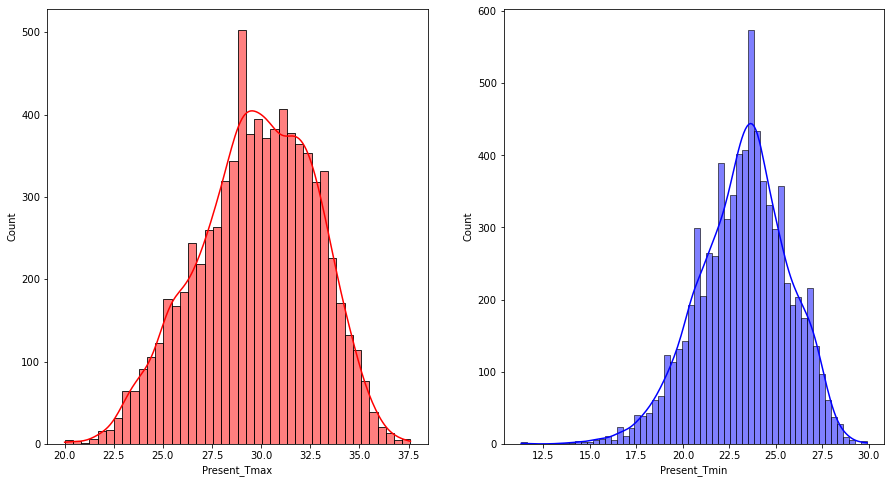

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='b')
print('Minimum Tmax is {} and Maximum Tmax is {}'.format(df['Present_Tmax'].min(),df['Present_Tmax'].max()))
print('Minimum Tmin is {} and Maximum Tmin is {}'.format(df['Present_Tmin'].min(),df['Present_Tmin'].max()))

Observation:
    
    

Present Tmax and Tmin are almost normally distibuted, Tmax have highest temp as 37.6 and min as 20, most of the days have tmax equal to 28.5, while Tmin have highest temp as 29.9 and min as 11.3, most of the days have tmin equal to 23.


Minimum RHmax is 58.93628311 and Maximum RHmax is 100.00015259999999
Minimum RHmin is 19.79466629 and Maximum RHmin is 98.5247345


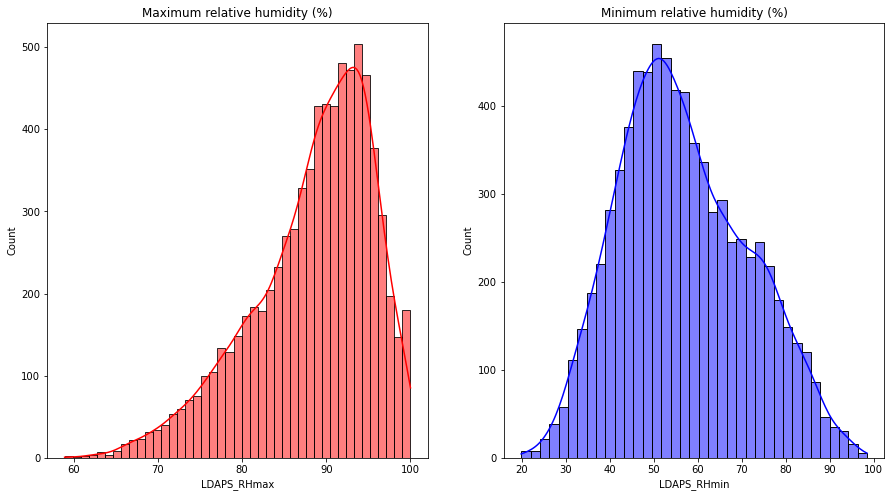

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)')
print('Minimum RHmax is {} and Maximum RHmax is {}'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} and Maximum RHmin is {}'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))



Data of Maximum relative humidity is left skewed and Data of Maximum relative humidity is slightly right skewed. RHmax for most of the days lie in the range 92 to 97 while RHmin lies in the range 45 to 62.


Minimum Tmax applied lapse rate is 17.62495378 and Maximum Tmax applied lapse rate is 38.54225522
Minimum Tmin is applied lapse rate 14.27264631 and Maximum Tmin applied lapse rate is 29.61934244


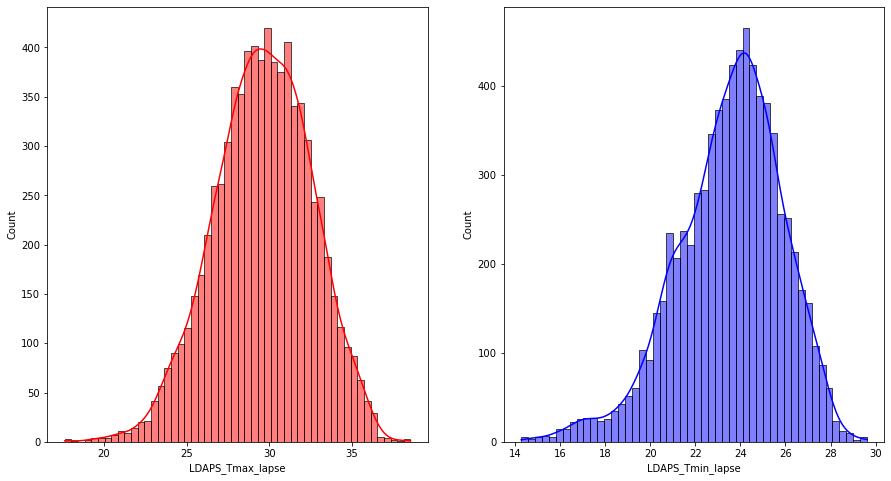

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='b')
print('Minimum Tmax applied lapse rate is {} and Maximum Tmax applied lapse rate is {}'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} and Maximum Tmin applied lapse rate is {}'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))



Tmax and Tmin for applied lapse rate are almost normally distributed, with Tmax_lapse having maximum at 38.54 , minimum at 17.62 and for majority of days its values lies in the range 27 to 32 while Tmin_lapse having maximum at 29.61 , minimum at 14.27 and for majority of days its values lies in the range 23 to 26


Minimum 2.882579625
Maximum 21.85762099


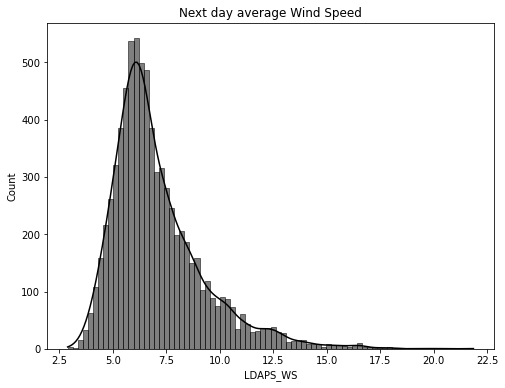

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='k')
plt.title('Next day average Wind Speed')
print('Minimum',df['LDAPS_WS'].min())
print('Maximum',df['LDAPS_WS'].max())



Data of average wind speed ris right skewed. It have its minimum value at 2.88m/s and maximum values at 21.85m/s and majority of its values lies in the rabge 5m/s to 8m/s


Minimum -13.60321209
Maximum 213.4140062


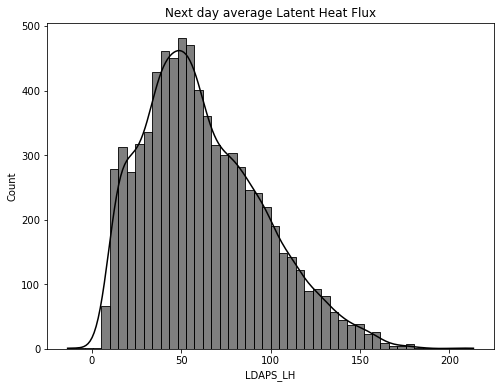

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_LH'],kde=True,color='k')
plt.title('Next day average Latent Heat Flux')
print('Minimum',df['LDAPS_LH'].min())
print('Maximum',df['LDAPS_LH'].max())



Latent heat flux seems to be normally distributed with slight skewness to the right. It has its minimum value at -13.60 and maximum values at 213.41 and majority of its values lies in the range 30 to 70.


#### Outliers

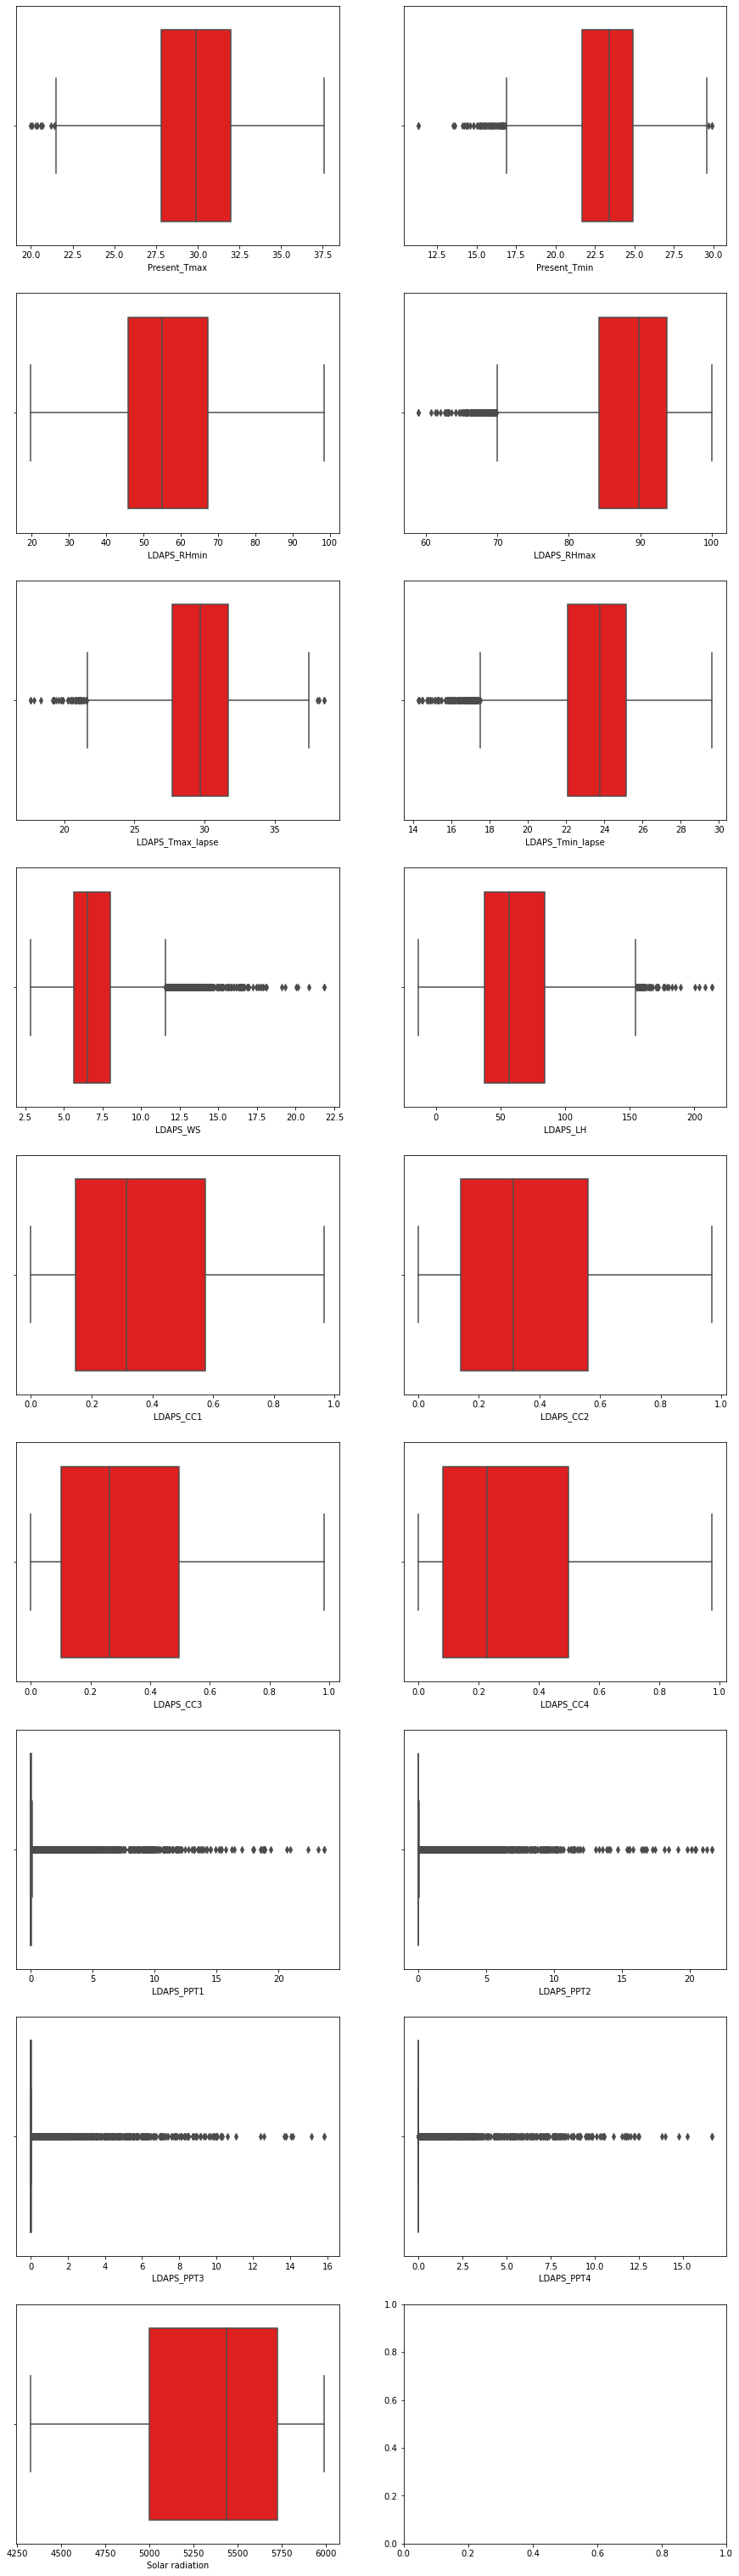

In [19]:
fig,ax=plt.subplots(9,2,figsize=(15,55))
r=0
c=0
for i, n in enumerate(cont[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(df[n],color='r',ax=ax[r,c])
    c+=1



There a large no. of outliers especially in the precipitation data. Latent heat flux, wind speed, temperature applied lapse rate and Rhmax also have presence of outliers. While there are few in present day tmax and tmin also.


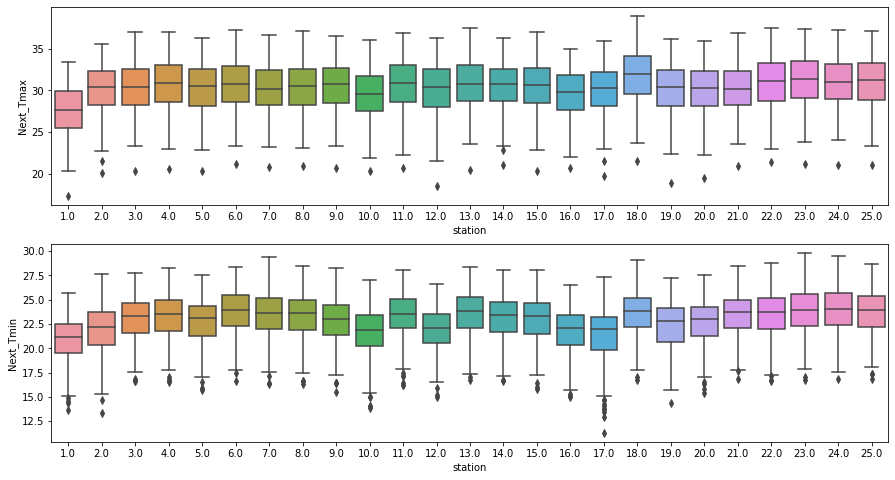

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=df)
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=df)
plt.show()



Station 18 observes highest temperature for both Tmax and Tmin while station 1 observes lowest temperatures for both. It coud be because of their location


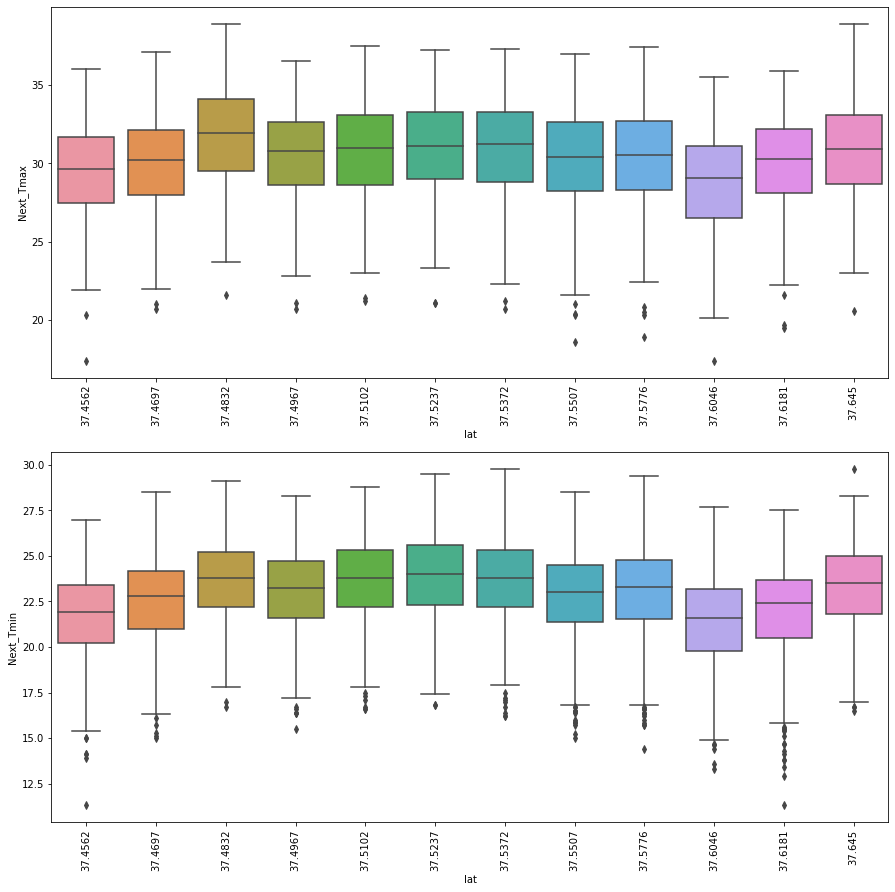

In [21]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=df)
plt.xticks(rotation=90)
plt.show()



Temperature seems to fall as the the latitude increases which is also a know fact. Highest temperature is observed at 37.645 for Tmax while this is not the case for tmin which could be because of the other factors that affect the temperature.


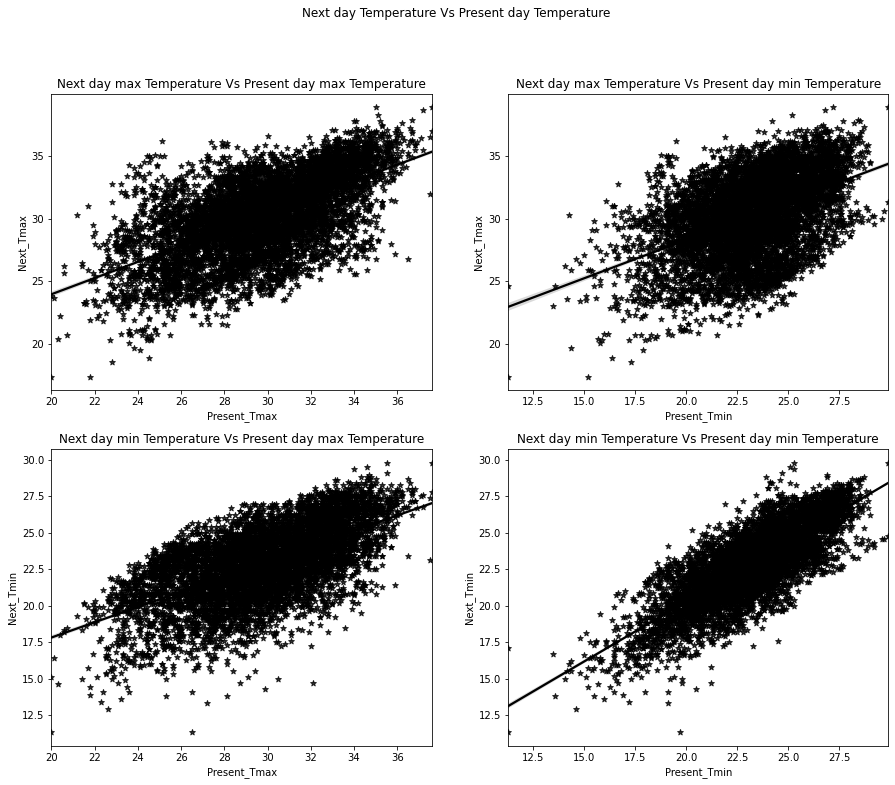

In [22]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperature Vs Present day Temperature')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmin',data=df,marker='*',color='k')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=df,marker='*',color='k')
plt.show()

here is high positive correlation of Next day temperatures with the present day temperatures.

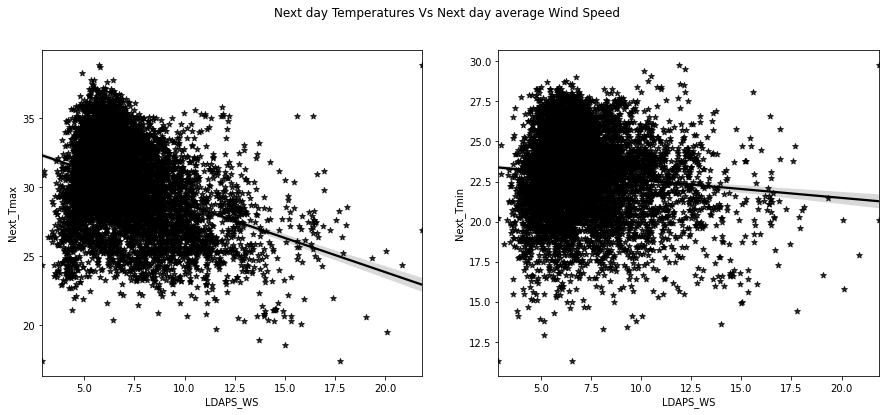

In [23]:
plt.figure(figsize=(15,6))
plt.suptitle('Next day Temperatures Vs Next day average Wind Speed')

plt.subplot(1,2,1)
sns.regplot(x='LDAPS_WS',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(1,2,2)
sns.regplot(x='LDAPS_WS',y='Next_Tmin',data=df,marker='*',color='k')

plt.show()



Temperarue decreases as the wind speed increases. Tmax seem to decrease more drastically than Tmin.


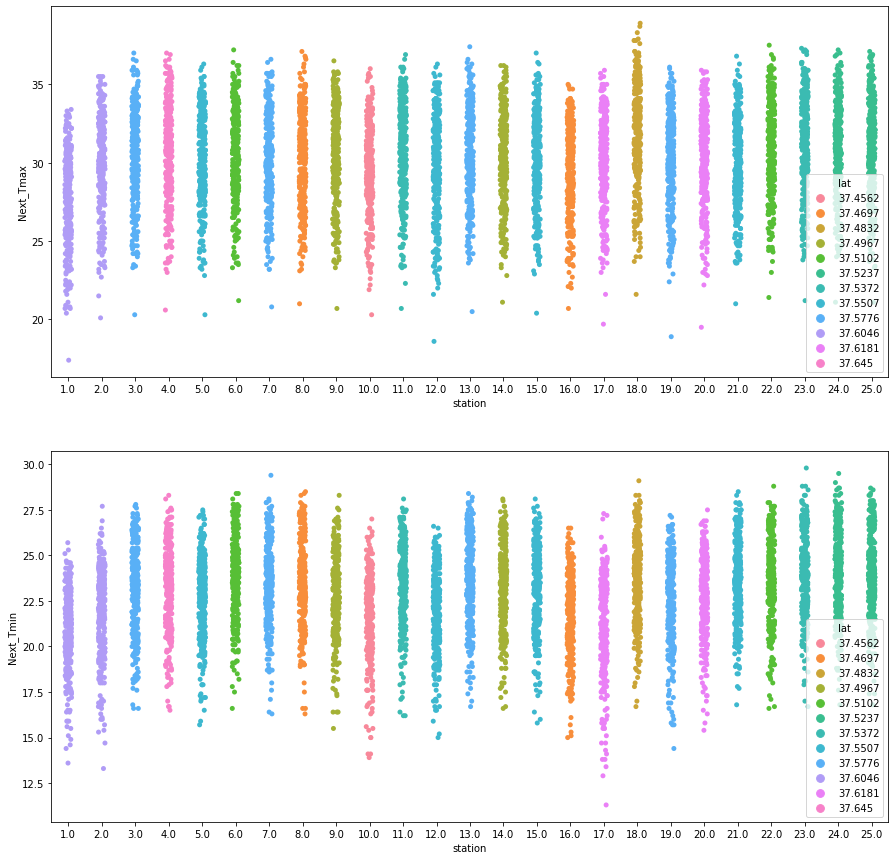

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmax',hue='lat',data=df)

plt.subplot(2,1,2)
sns.stripplot(x='station',y='Next_Tmin',hue='lat',data=df)
plt.show()



Each station is located on a particular lalitude, There are atmost 3 staions on a single latitude, and as the latitude decreases, temperature seem to increase.


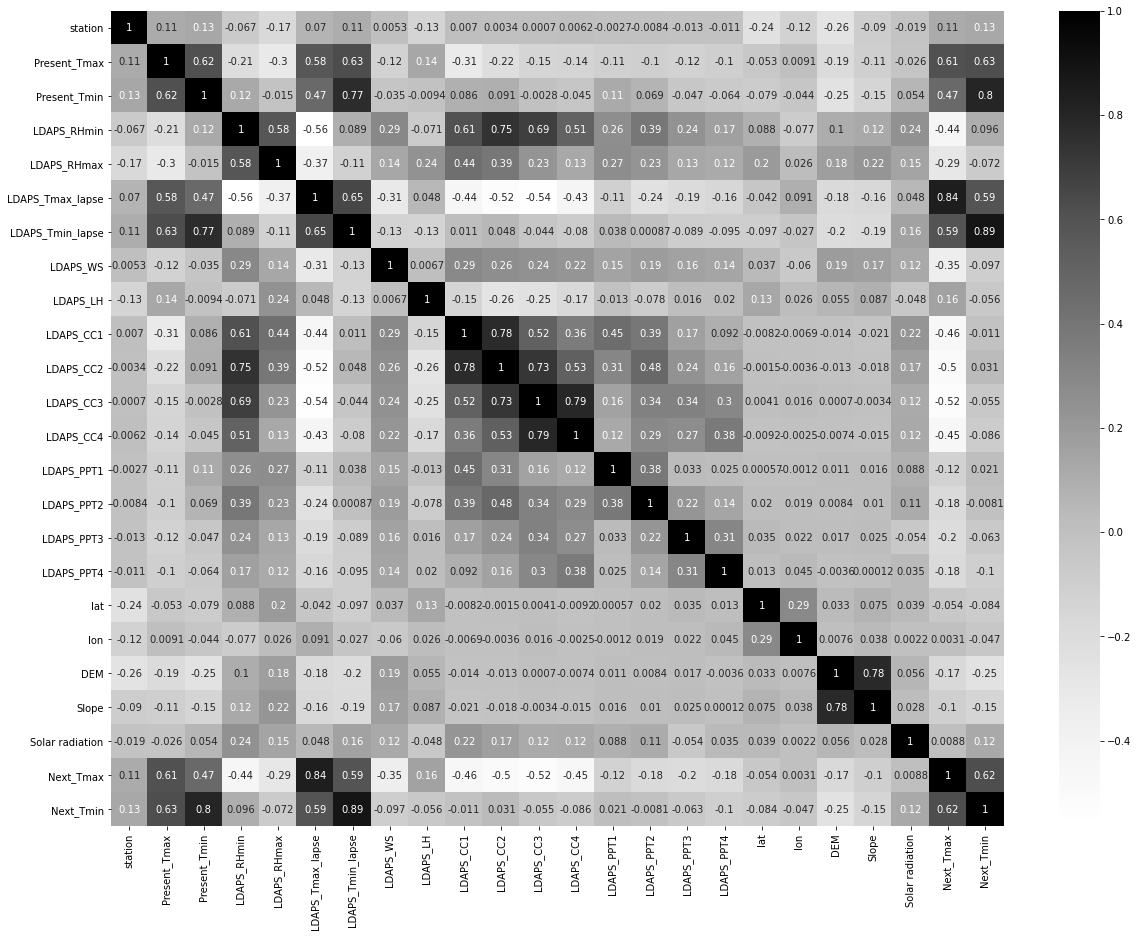

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='Greys')
plt.show()



There is high correlation of Next day Tmax and Tmin with Present day Tmax and Tmin, Tmax applied lapse rate and Tmin applied lapse rate. There is also a high negative correlation of Tmax with cloud cover splits and relative minimum humidity. There is also high correlation between many independent features such as Present Day Tmax and Tmin, elevation ans slope etc. Multicollinearity need to be eliminated.


In [26]:
#droping date column
df.drop('Date',axis=1,inplace=True)

In [27]:
# rounding off the value of slope
df['Slope'].unique()

array([2.785    , 0.5141   , 0.2661   , 2.5348   , 0.5055   , 0.1457   ,
       0.0985   , 1.5629   , 0.4125   , 5.1782   , 0.6233   , 0.5931   ,
       2.6865   , 0.618    , 0.8552   , 2.2579   , 0.697    , 1.2313   ,
       1.7678   , 4.7296   , 0.5721   , 0.1332   , 0.1554   , 0.2223   ,
       0.2713   , 0.0984746, 5.17823  ])



As seen in EDA process 0.0984746 need to be rounded as 0.0985 and 5.17823 need to be rounded as 5.1782


In [28]:
df['Slope'].replace({0.0984746:0.0985,5.17823:5.1782},inplace=True)

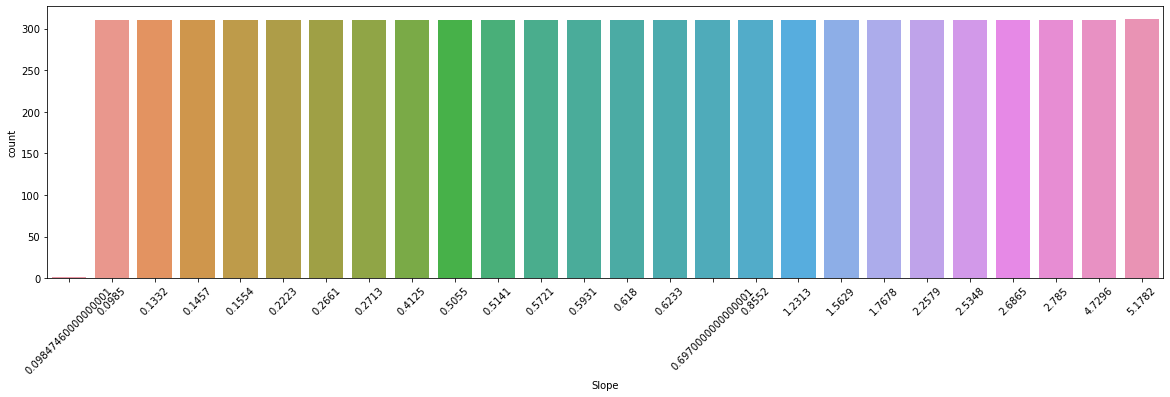

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(df['Slope'])
plt.xticks(rotation=45)
plt.show()



Now there are no ambiguous values


In [30]:
# imputing null values
df=df[df['Next_Tmax'].notnull()]

In [31]:
# station column
table=pd.pivot_table(values='station',index='Slope',data=df)

In [32]:
table.head()

,station
Slope,
0.0985,7.0
0.1332,22.0
0.1457,6.0
0.1554,23.0
0.2223,24.0




FIlling nan values of station from slope column as slope serves as an identifier column to station.


In [ ]:
def sta(x):
    return table.loc[x['Slope'],'station']

df['station'].fillna(df[df['station'].isnull()].apply(sta,axis=1),inplace=True)

In [34]:
# droping the row which have atleast 14 null values


df.dropna(subset=df.columns, thresh=14,inplace=True)

In [35]:
df.dropna(inplace=True)

<AxesSubplot:>

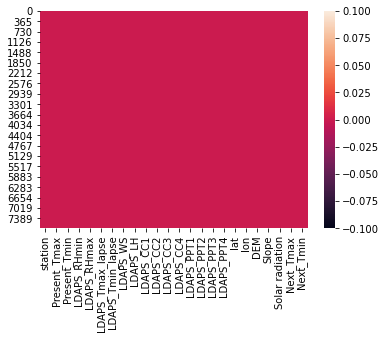

In [36]:
sns.heatmap(df.isnull())


there is no null values remain

### Removing outliers


In [37]:
#Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100

In [39]:
z=np.abs(zscore(df))
threhold(z,df)

In [40]:
#We use threshold as 4.2 because data is expensive and upon evaluation of models this threhold turned out to be the best.
df=df[(z<4.2).all(axis=1)]

In [42]:
pt=PowerTransformer()

In [43]:
for i in cont:
    if np.abs(df[i].skew())>=0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

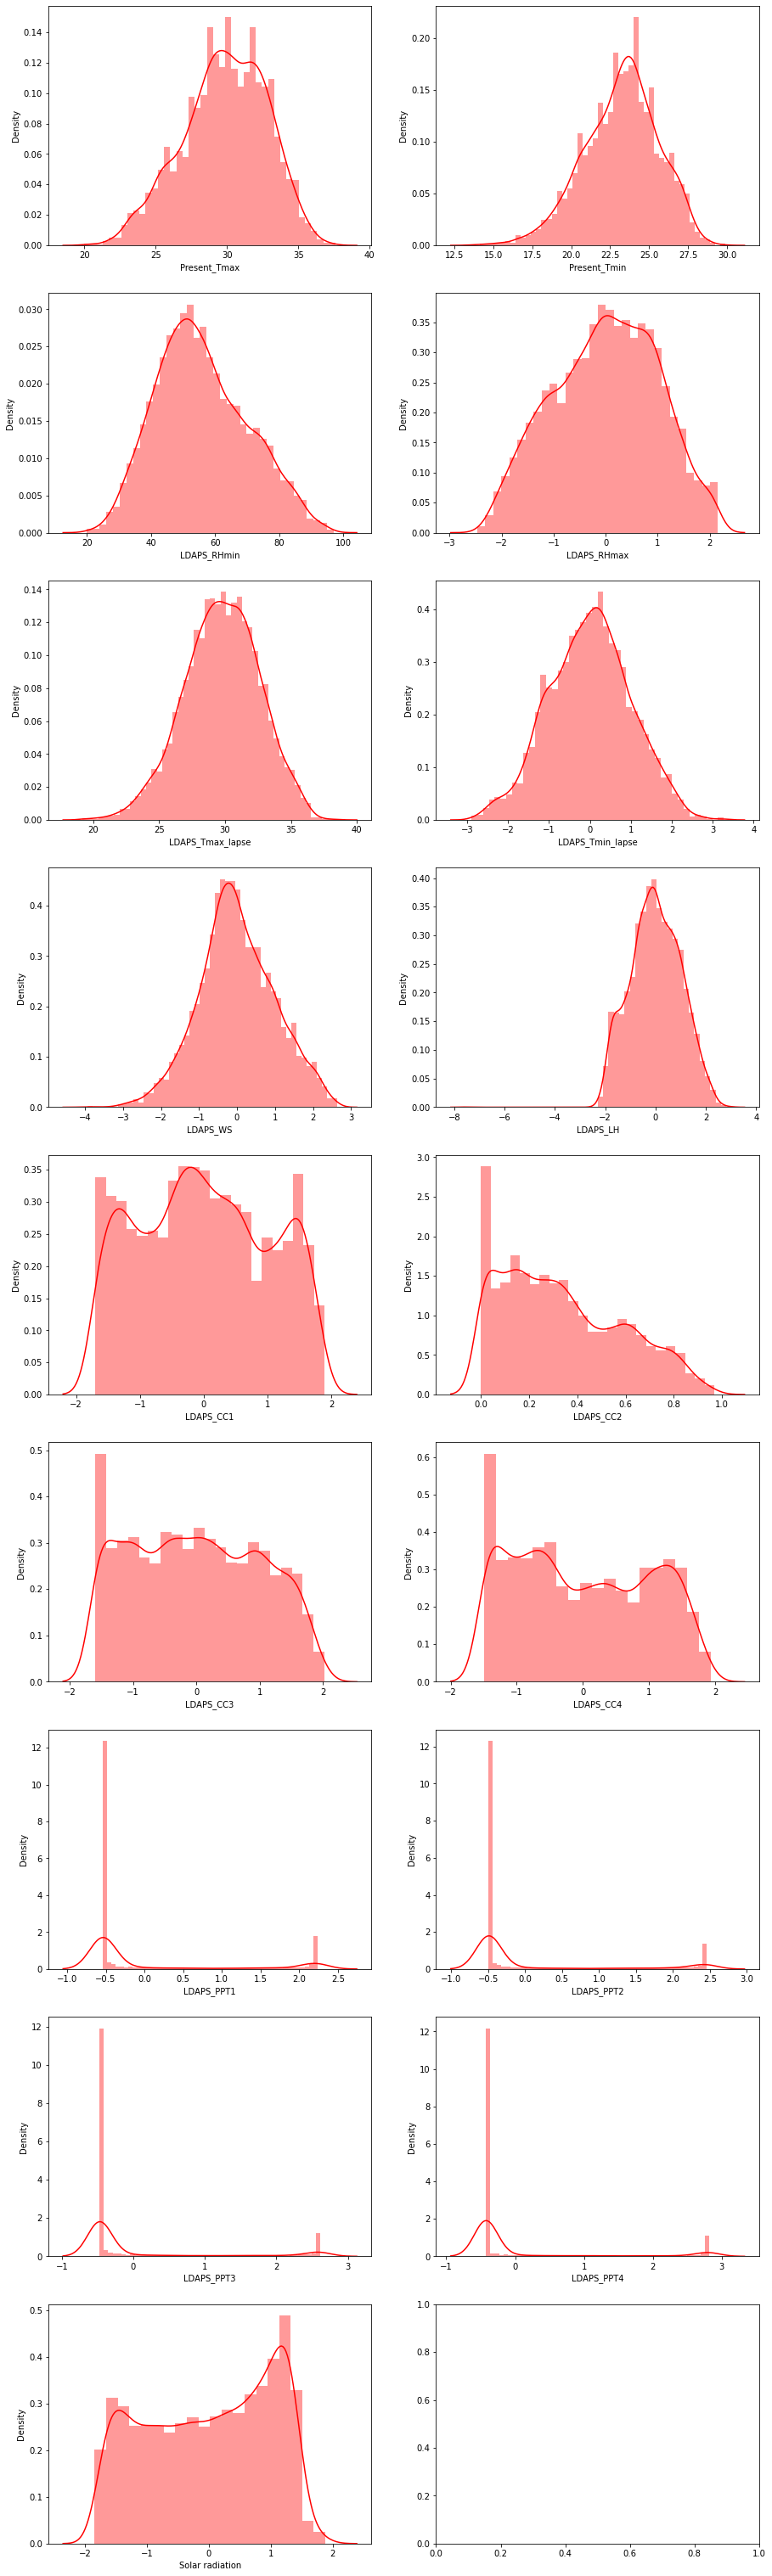

In [44]:
fig,ax=plt.subplots(9,2,figsize=(15,55))
r=0
c=0
for i, n in enumerate(cont[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],color='r',ax=ax[r,c])
    c+=1

Skewness is reduced considerably

In [45]:
#Separating dependent and independent features.
x=df.copy()
x.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)
ymax=df['Next_Tmax']
ymin=df['Next_Tmin']

In [46]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [47]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

#### Modelling Phase

In [51]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=10000000000000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [52]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [53]:
def createmodels(model_list,x,y,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=5)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2)*100)
        mcv.append(np.round(np.mean(score),2)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross Validation Score']=mcv
    data.set_index('Model',inplace = True)
    return data   

In [54]:
createmodels(models,x,ymax,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,1.0438,1.9286,1.3887,7.000000e+01,47.0
SVR,0.8461,1.3286,1.1526,8.200000e+01,65.0
LinearRegression,1.0455,1.8499,1.3601,7.400000e+01,70.0
Lasso,2.4453,8.8967,2.9827,-7.048728e+31,-7.0
Ridge,1.0446,1.8511,1.3606,7.400000e+01,70.0
DecisionTreeRegressor,1.0193,2.0669,1.4377,7.800000e+01,45.0
RandomForestRegressor,0.7114,0.9050,0.9513,8.800000e+01,68.0
AdaBoostRegressor,1.1938,2.1718,1.4737,6.100000e+01,67.0
GradientBoostingRegressor,0.8891,1.3172,1.1477,8.200000e+01,70.0




For pedicting Next day Maximum Temperature Random Forest, Xtreme Gradient Boost give the least error value while Ridge regressor is giving the highest mean of cross validation score along with Gradient Boosting Model.


In [55]:
createmodels(models,x,ymin,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,0.8201,1.1841,1.0881,70.0,47.0
SVR,0.6112,0.6193,0.7870,88.0,75.0
LinearRegression,0.7644,0.9232,0.9608,82.0,78.0
Lasso,1.9588,5.9773,2.4449,0.0,-14.0
Ridge,0.7645,0.9225,0.9605,81.0,78.0
DecisionTreeRegressor,0.8623,1.3633,1.1676,77.0,59.0
RandomForestRegressor,0.5682,0.5514,0.7425,89.0,78.0
AdaBoostRegressor,0.8482,1.1128,1.0549,76.0,74.0
GradientBoostingRegressor,0.6313,0.6447,0.8029,87.0,80.0




Same is the case while prediction Next day minimum temperature as Random Forest, Xtreme Gradient Boost give the least error value while Gradient Boost is giving the highest mean of cross validation score.


Reducing Multicollinearity using Lasso

In [57]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymax)
print(m1.best_params_)

{'alpha': 0.001}


In [58]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymax)

Lasso(alpha=0.001)

In [59]:
importance = np.abs(m1.coef_)

In [60]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,station,0.414879
1,Present_Tmax,2.893795
2,Present_Tmin,0.446038
3,LDAPS_RHmin,1.864469
4,LDAPS_RHmax,0.031077
5,LDAPS_Tmax_lapse,12.244269
6,LDAPS_Tmin_lapse,1.269848
7,LDAPS_WS,1.790647
8,LDAPS_LH,2.673350
9,LDAPS_CC1,0.291536


In [61]:
xlasso=x.drop('station',axis=1)

In [62]:
createmodels(models,xlasso,ymin,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,0.7397,0.9733,0.9866,78.0,46.0
SVR,0.6082,0.6085,0.7801,88.0,74.0
LinearRegression,0.7641,0.9226,0.9605,82.0,78.0
Lasso,1.9588,5.9773,2.4449,0.0,-14.0
Ridge,0.7642,0.9220,0.9602,81.0,78.0
DecisionTreeRegressor,0.8649,1.3663,1.1689,77.0,56.0
RandomForestRegressor,0.5639,0.5497,0.7414,89.0,78.0
AdaBoostRegressor,0.8576,1.1293,1.0627,75.0,74.0
GradientBoostingRegressor,0.6313,0.6407,0.8004,87.0,80.0


Performances of models have increased, Errors have been reduced and mean cross validation score of XGBRegressor has increased. So we keep this dataset for predicting Next day minumum Temperature.

Hyperparameter Tuning

For Next day Maximum Temperature

In [63]:
xtrain_max,xtest_max,ytrain_max,ytest_max=train_test_split(x,ymax,test_size=0.25,random_state=randomstate(x,ymax))

Ridge Regressor

In [64]:
params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,200,
                     230, 250,265, 270, 275, 290, 300, 500,1000]}

In [65]:
g=GridSearchCV(Ridge(),params,cv=10)

In [66]:
g.fit(xtrain_max,ytrain_max)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110,
                                   150, 200, 230, 250, 265, 270, 275, 290, 300,
                                   500, 1000]})

In [67]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

Ridge(alpha=0.1)
{'alpha': 0.1}
0.7613510980492191


In [68]:
m=Ridge(alpha=0.1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [69]:
score=cross_val_score(m,x,ymax,cv=10)

In [70]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 1.0453
Mean Squared Error is 1.8499
Root Mean Squared Error is 1.3601
R2 Score is 73.89
Mean of cross validaton Score is 66.3539


Random forest

In [71]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15]}

In [73]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-2)

In [74]:
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [75]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=3,
                      n_estimators=200)
{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 9}
0.858684211096239


In [76]:
m=RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=3,n_estimators=200)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [77]:
score=cross_val_score(m,x,ymax,cv=10)

In [78]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.7266
Mean Squared Error is 0.9498
Root Mean Squared Error is 0.9746
R2 Score is 87.02
Mean of cross validaton Score is 64.7633


#### Gradient Boost

In [79]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [80]:
g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

In [81]:
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [82]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.1}
GradientBoostingRegressor(max_depth=6, n_estimators=400, subsample=0.5)
0.918295146121


In [83]:
m=GradientBoostingRegressor(max_depth=7, n_estimators=500, subsample=1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [84]:
score=cross_val_score(m,x,ymax,cv=10)

In [85]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.6278
Mean Squared Error is 0.7269
Root Mean Squared Error is 0.8526
R2 Score is 90.77
Mean of cross validaton Score is 63.9761


In [86]:
params={
     "learning_rate"    : [0.001,0.05, 0.10 ] ,
     "max_depth"        : [ 5, 6, 8, 10, 12, 15,20,25,30],
     "min_child_weight" : [ 1, 3, 5,10],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,10],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [87]:
g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10,n_jobs=-2)

In [88]:
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_la

In [89]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
{'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.4}
0.9152499633459235


In [90]:
m=XGBRegressor(colsample_bytree=0.4,gamma=0.3,learning_rate=0.1,max_depth=10, min_child_weight=10)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [91]:
score=cross_val_score(m,x,ymax,cv=10)

In [92]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.6482
Mean Squared Error is 0.7106
Root Mean Squared Error is 0.843
R2 Score is 90.85
Mean of cross validaton Score is 65.2286




Extreme Gradient Boost is giving the best performance with least mean absolute error, mean squared error, root mean squared error and highest mean cross validation r2 score after ridge. So we choose this model as our final model.


#### For Next day Minimun Temperature

In [93]:
xtrain_min,xtest_min,ytrain_min,ytest_min=train_test_split(xlasso,ymin,test_size=0.25,random_state=randomstate(xlasso,ymin))

#### Random Forest

In [94]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15,20,25]}

In [95]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-2)

In [96]:
g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15, 20, 25],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [97]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 25}
RandomForestRegressor(max_depth=25, min_samples_split=4, n_estimators=200)
0.8979408635356656


In [98]:
m=RandomForestRegressor(max_depth=25, min_samples_split=3, n_estimators=300)
m.fit(xtrain_min,ytrain_min)
p=m.predict(xtest_min)

In [99]:
score=cross_val_score(m,xlasso,ymin,cv=10)

In [100]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.5595
Mean Squared Error is 0.538
Root Mean Squared Error is 0.7335
R2 Score is 89.41
Mean of cross validaton Score is 74.4836


#### Gradient Boost

In [101]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [102]:
g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

In [103]:
g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [104]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1}
GradientBoostingRegressor(max_depth=7, n_estimators=500, subsample=0.5)
0.9348245674193713


In [105]:
m=GradientBoostingRegressor(max_depth=9, n_estimators=200, subsample=0.5)
m.fit(xtrain_min,ytrain_min)
p=m.predict(xtest_min)

In [106]:
score=cross_val_score(m,xlasso,ymin,cv=10)

In [107]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.4703
Mean Squared Error is 0.3845
Root Mean Squared Error is 0.6201
R2 Score is 92.9
Mean of cross validaton Score is 75.0613


#### Extreme Gradient Boost

In [108]:
params={
     "learning_rate"    : [0.001,0.05, 0.10 ] ,
     "max_depth"        : [ 5, 6, 8, 10, 12, 15,20,25,30],
     "min_child_weight" : [ 1, 3, 5,10],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,10],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [109]:
g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

In [110]:
g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_la

In [111]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 10, 'colsample_bytree': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=10, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
0.9110687585515083


In [112]:
m=XGBRegressor(colsample_bytree=0.7,gamma=0.3,learning_rate=0.1,max_depth=10, min_child_weight=3)
m.fit(xtrain_min,ytrain_min)
p=m.predict(xtest_min)

In [113]:
score=cross_val_score(m,xlasso,ymin,cv=10)

In [114]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.4705
Mean Squared Error is 0.3774
Root Mean Squared Error is 0.6143
R2 Score is 92.88
Mean of cross validaton Score is 76.1607




Extreme Gradient Boost is giving the best performance with least mean absolute error and highest mean cross validation r2 score. So we choose this model as our final model.


Finalizing the model

In [115]:
model_tmax=XGBRegressor(colsample_bytree=0.7,gamma=0.0,learning_rate=0.1,max_depth=30, min_child_weight=10)
model_tmax.fit(xtrain_max,ytrain_max)
p_tmax=model_tmax.predict(xtest_max)
score_tmax=cross_val_score(m,x,ymax,cv=10)

In [116]:
model_tmin=XGBRegressor(colsample_bytree=0.7,gamma=0.0,learning_rate=0.1,max_depth=30, min_child_weight=10)
model_tmin.fit(xtrain_min,ytrain_min)
p_tmin=model_tmin.predict(xtest_min)
score_tmin=cross_val_score(m,xlasso,ymin,cv=10)

#### Evaluation Metrics

In [117]:
print('Evaluation Metrics for Next Day Maximum Temperature')
print('Mean Absolute Error is',np.round(mean_absolute_error(p_tmax,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p_tmax,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p_tmax,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p_tmax,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score_tmax)*100,4))

Evaluation Metrics for Next Day Maximum Temperature
Mean Absolute Error is 0.6113
Mean Squared Error is 0.6524
Root Mean Squared Error is 0.8077
R2 Score is 91.78
Mean of cross validaton Score is 66.1795


In [118]:
print('Evaluation Metrics for Next Day Minimum Temperature')
print('Mean Absolute Error is',np.round(mean_absolute_error(p_tmin,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p_tmin,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p_tmin,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p_tmin,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score_tmin)*100,4))

Evaluation Metrics for Next Day Minimum Temperature
Mean Absolute Error is 0.456
Mean Squared Error is 0.3503
Root Mean Squared Error is 0.5918
R2 Score is 93.41000000000001
Mean of cross validaton Score is 76.1607


#### Model Saving

In [119]:
import joblib
joblib.dump(model_tmax,'temperaturepredictiontmax.pkl')

['temperaturepredictiontmax.pkl']

In [120]:
joblib.dump(model_tmin,'temperaturepredictiontmin.pkl')

['temperaturepredictiontmin.pkl']